# Data Bootcamp Final Project: Fall 2017

## The Link Between Refugee Migration and Terrorism

### Mia Averianova and Michael Ttappous


## Introduction

***Research question***: *Which developed countries are most involved with refugee crises? Is terrorism in countries that host refugees related to the number of refugees they host?*

This project will look at refugee and terrorism data from 1990 up to 2016 and will analyze the countries that have taken in the greatest number of refugees. We will use datasets from WorldBank, the UN Refugee Agency and other sources to gather and filter the data on annual refugee movement rates.

The main point of the analysis is to look closely at a selected number of developed host countries after they have open their borders to refugees and to look at the number of terrorist attacks in such countries. The main data on refugees will be filtered to find top 3 developed countries that have taken the biggest number of refugees between 1990 - 2016. In order to make sure that the chosen countries fall under "developed", we will look at:  *changes in GDP* and *unemployment rate*. Next, we will look at the general terrorism dataset and come up with hypothesis that can potentially answer our research question.  

We seek to accomplish this analysis by splitting this paper into 4 parts.

* Part 1 will address the background of the question and the data sets that will be used for analysis.
* Part 2 will clean multiple datasets and manipulate them to address the question.
* Part 3 will visualize the data and provide concluding remarks based on numerical and graphical representations of the analysis.
* Part 4 will draw conclusions from our analysis

We will begin first by importing the necessary packages with which to begin our investigation:

In [1]:
%matplotlib inline

# Import packages in order to bring in, manipulate, and visualize data:
from mpl_toolkits.basemap import Basemap 
import sys
import pandas as pd
import pandas_datareader as pdread
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


# Print versions and date:

%matplotlib inline             
print('Python Version: ', sys.version)
print('Pandas Version: ', pd.__version__)
print("Today's Date: ", dt.date.today())



Python Version:  3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas Version:  0.20.1
Today's Date:  2017-12-21


In [2]:
# Render our plots inline
%matplotlib inline
import matplotlib
# Changing the visual style of the plots by making them a little bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Part One: Getting our data

As discussed in the introduction, this project will consider refugee and terrorism data for a selected number of countries that, in recent years, opened their borders to the greatest number of refugees.

In order to answer our research question, we have examined articles that talk about refugee and terrorism statistics. Below is an outlined list of the articles that give us updated information about the topic in question:

* *[Countries Hosting The Largest Numbers Of Refugees In The World](http://www.worldatlas.com/articles/countries-hosting-the-largest-number-of-refugees-in-the-world.html)* by World Atlas
* *[Turkey, Pakistan, Lebanon Host the Highest Number of Refugees](https://www.bloomberg.com/graphics/2017-countries-of-asylum-for-migrants/)* by Bloomberg
* *[Social and economic impact of large refugee populations on host developing countries](http://www.unhcr.org/en-us/excom/standcom/3ae68d0e10/social-economic-impact-large-refugee-populations-host-developing-countries.html)* by UNHCR
* *[Refugees Can Offer Economic Boost to Their Host Countries](https://www.ucdavis.edu/news/refugees-can-offer-economic-boost-their-host-countries/)* by UCDavis
* [The chances of a refugee killing you - and other surprising immigration stats](http://www.cnn.com/2017/01/30/politics/immigration-stats-by-the-numbers-trnd/index.html) by CNN politics
* [Refugees: the Trojan horse of terrorism?](https://www.opendemocracy.net/can-europe-make-it/jeff-crisp/refugees-trojan-horse-of-terrorism) by OpenDemocracy

The articles mentioned fed into our thought process about the perception of refugees and the assosciations made with terrorism. Some articles include statistics that have helped us determine how to clean the data sets expounded on in Part Two and have allowed us to emphasize the countries most relevant to our analysis. They have also served to enforce the significance of our research question as there is a seeming need to do more investigation into whether there is a perceived fear that the number of terrorist attacks inside a developed country can increase with the number of refugees that that country hosts.

Beyond these content sources, our next step involved locating and identifying a range of data that can be used to address these concerns and to answer our research question. Our chosen datasets are as follows:

* [Data on refugee population by country of origin](https://data.worldbank.org/indicator/SM.POP.REFG.OR?view=chart)
* [Data on refugee population by country of asylum](http://popstats.unhcr.org/en/resettlement)
* [Unemployment rate](https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS) (all countries)
* [GDP growth](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG) (all countries)
* [Global terrorism database](https://www.kaggle.com/START-UMD/gtd) (all countries)
* [World population](https://data.worldbank.org/indicator/SP.POP.TOTL) (all countries)

Important information to note:
* Our timeframe has been set as 1990-2016 as there is enough data after cleaning the relevant datasets to perform more informative analysis on this period.
* All the datasets above are linked to their original source. For the sake of reliability and convenience, we have downloaded the original datasets and uploaded them into our [Github Repository](https://github.com/MichaelTtappous/Final_Project). All of these datasets are idenitical except for our dataset on terrorism. This has been modified and cleaned manually since the original file is too big and too time-consuming to work with. For this dataset, we dropped columns such as "Type of Terrorist Attack" and "Precise City", among others, to make the dataset as relevant as possible.

## Part Two: Understanding our Data Sets

### Section 1: Refugee Population by Country of Origin

In this section, we start by importing a dataset from the World Bank, available [here](https://data.worldbank.org/indicator/SM.POP.REFG.OR?view=chart).

This data tells us the number of people that have fled each country as refugees, with data available from 1990 onwards. We are using this dataset to get an idea of how many refugees there are in the world and also what countries the refugees are fleeing from.

In [3]:
url = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/Refugee_numbers.csv'

ref = pd.read_csv(url,              # We read the csv file and assign it to ref (for refugees)
                  skiprows=4,       # Skip the first 4 rows, which contain irrelevant data
                  index_col=0)      # Set the index as the first column, which are the country names

For our convenience, since we are using multiple data sets, we loaded them all in one place on github. Should we want to link the datasets to their pages of origin, we would use the following code:

In [4]:
#url = "http://api.worldbank.org/v2/en/indicator/SM.POP.REFG.OR?downloadformat=csv"
#ref = pd.read_csv(url, encoding="ISO-8859-1",  # We read the csv file and assign it to ref (for refugees)
                  #skiprows=4,       # Skip the first 4 rows, which contain irrelevant data.
                  #index_col=0)      # set the index as the first column, which are the country names

In [5]:
# For the sake of brevity and concision, we have not run all of the code that is outlined in the below Sections.
# These were, however, vital to our manipulation and understanding of our datasets.

# ref.shape # This tells us just how many rows and columns of data there are 
# ref.dtypes To check for the type of data (e.g. object, float etc.)
# ref.head(5) # Here we look at the top fifteen entrees in the dataset to get a feel of the dataset given

The dataset includes columns that are not of interest to us in this paricular dataset. We can thus drop these to clean up our dataset. A quick glance at the data set will also show us that there are no values for refugee data before 1990. This means that we can clean up the data even further by dropping the years from 1960-1990.

In [6]:
useless_columns = ['Indicator Code', 'Indicator Name','Country Code', 'Unnamed: 62', '2017', 
                   # We have data missing in the last two entrees
                    '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
                    '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
                    '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']  # And here we drop 
                                                                                             # the unnecessary years
ref = ref.drop(useless_columns, axis = 1) # Here, we manipulate the data to drop some of the unnecessary columns.
# ref.head(5) - We can see that those columns have now been removed and our data is much cleaner
ref.shape # we have gotten rid of more than half of the columns in the dataset 
          # to make it more applicable to our question.
ref = ref.transpose() # Here we transpose the dataset so that the index can be set by year
ref.index.name = 'Year' # Here we set the index name as the Year

data = ['Low & middle income', 'IDA & IBRD total', 'Fragile and conflict affected situations', 'IDA total',
       'IDA only', 'Pre-demographic dividend', 'Least developed countries: UN classification', 
        'Heavily indebted poor countries (HIPC)','Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD countries)',
        'Low income', 'Middle income', 'Sub-Saharan Africa (excluding high income)', 'South Asia', 
        'South Asia (IDA & IBRD)','IBRD only', 'Lower middle income', 'Arab World', 'Upper middle income',
        'Early-demographic dividend', 'Middle East & North Africa', 
        'Middle East & North Africa (excluding high income)', 'Middle East & North Africa (IDA & IBRD countries)',
        'Late-demographic dividend', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)', 
        'Europe & Central Asia (excluding high income)', 'East Asia & Pacific', 
        'East Asia & Pacific (excluding high income)', 'East Asia & Pacific (IDA & IBRD countries)', 
       'Post-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)'] 
ref = ref.drop(data, axis = 1) # Here we drop the columns that are not countries.

In [7]:
ref = ref.dropna(axis=1,how='all')
# ref.head(5)


### Section 2: Countries and the Number of Refugees they Host

In this section, we bring in data from the UN Refugee Agency about *[Countries Hosting Refugees](http://popstats.unhcr.org/en/resettlement)*.

This dataset tells us about how many refugees were rellocated to certain countries from 1959-2016.
Similarly to Section 1, we perform a couple of manipulations to understand and clean our data.

In [8]:
url2 = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/Resettlement%20Numbers.csv'
# we are using the same github repository for consistency 
ref2 = pd.read_csv(url2) # We read the csv file and assign it to ref2 (for resettled refugees)


In [9]:
ref2 = ref2.rename(columns={'Country / territory of asylum/residence':
                            'Country', 'Value': 'Refugees'})
# Rename the columns that we are going to use for clarfication
ref2.head(5)
ref2 = ref2[ref2.Refugees.apply(lambda x: x.isnumeric())]
# Drop all the rows that have a non-integer in the Refugees column (will help with manipulation)    
# ref2.shape
# ref2.dtypes

In [10]:
ref2 = ref2.convert_objects(convert_numeric=True)
# Here we convert the values in the Refugees column from object to integer
# ref2.dtypes
# Check that Refugees is an int64 type

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [11]:
ref2_c = ref2.groupby(['Year', 'Country']).sum()
# Here, we group first by year so that we have one row per year and then 
# we group by country so that there is one observation per country.
# The number of refugees by country is also summed per country, per year.
ref2_pivot = ref2_c.pivot_table(values='Refugees', index='Year', columns='Country')

In [12]:
useless_rows = [1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
                1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 
                1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]  
# As we care about making comparisons between the datasets, we can drop these years 
# and focus solely on the last 25 years of available data.
ref2_p = ref2_pivot.drop(useless_rows, axis = 0) # We drop the assigned years
# ref2_p.head(20)

### Section 3: Countries and Unemployment Rates

In order to determine whether the countries we choose for our closer analysis fall under "developed" category, we will bring in and analyze data on [unemployment rates](https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS) and [GDP growth rates](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG)*.

In [13]:
url3 = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/Unemployment%20Rates.csv'

une = pd.read_csv(url3,              # We read the csv file and assign it to ref (for refugees)
                  skiprows=4,       # Skip the first 4 rows, which contain irrelevant data.
                  index_col=0)      # set the index as the first column, which are the country names

In [14]:
une = une.drop(useless_columns, axis = 1) # Here, we manipulate the data to drop some of the unnecessary columns.
# We can use the same columns as defined before because the source is the same (World Bank)

In [15]:
une = une.transpose() # Here we transpose the dataset so that the index is set by year
ref.index.name = 'Year' # Here we set the index name as the Year
une = une.dropna(axis=1,how='all')

### Section 4: Countries and Annual GDP Growth Rates

In [16]:
url4 = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/GDP%20Growth%20Rates.csv'

gdp = pd.read_csv(url4,              # We read the csv file and assign it to ref (for refugees)
                  skiprows=4,       # Skip the first 4 rows, which contain irrelevant data.
                  index_col=0)      # set the index as the first column, which are the country names

In [17]:
gdp = gdp.drop(useless_columns, axis = 1) # Here, we manipulate the data to drop some of the unnecessary columns.
# We can use the same columns as defined before because the source is the same (World Bank)

In [18]:
gdp = gdp.transpose() # Here we transpose the dataset so that the index is set by year
ref.index.name = 'Year' # Here we set the index name as the Year
gdp = gdp.dropna(axis=1,how='all')

### Section 5: Global terrorism by country

This dataset proved more difficult to manipulate. We used the dataset from University of Maryland that gave us a great representation of terrorist activity around the world. However, there are a couple of issues. Firstly, the dataset is too big and we had to clean it manually in order to upload it to Github. Secondly, the dataset was downloaded from Kaggle and we struggled to extract it as a url. As a result, we decided to filter the dataset and use only parts of it for our analysis (the file posted on Github).

In [19]:
url5 = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/global_terrorism.csv'

gt = pd.read_csv(url5, encoding="ISO-8859-1",      
                  skiprows=0)     
#If we wanted to use the original dataset:
#url5 = 'https://www.kaggle.com/START-UMD/gtd/downloads/gtd.zip'
#df = pd.read_csv(url5, low_memory=False, encoding='ISO-8859-1')

In [20]:
 # Here we set the index name as the Year
gt.index.name = 'ID' 

In [21]:
# Rename the columns that we are going to use for clarfication
gt = gt.rename(columns={'iyear':'Year', 'imonth':
                            'Month', 'iday': 'Day', 'country':'Country', 'region': 'Region_n',
                       'region_txt': 'Region', 'provstate': 'Provstate', 'city':'City', 'latitude':'Latitude',
                       'longitude':'Longitude', 'attacktype1':'Attack_n', 'attacktype1_txt':'Attacktype',
                       'targtype1_txt' :'Target_type', 'targsubtype1':'Subtarget_n', 'targsubtype1_txt':'Subtarget',
                       'corp1':'Corporation', 'target1':'Target', 'natlty1': 'Nationality_n', 
                       'natlty1_txt':'Nationality'})

### Section 6: Country Populations


We use [World population](https://data.worldbank.org/indicator/SP.POP.TOTL) dataset in order to normalize our data according to populations.

In [22]:
url6 = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/Populations.csv'

pop = pd.read_csv(url6,              # We read the csv file and assign it to ref (for refugees)
                  skiprows=4,       # Skip the first 4 rows, which contain irrelevant data.
                  index_col=0)      # set the index as the first column, which are the country names

In [23]:
pop = pop.drop(useless_columns, axis = 1) # Here, we manipulate the data to drop some of the unnecessary columns.
# We can use the same columns as defined before because the source is the same (World Bank)

In [24]:
pop = pop.transpose() # Here we transpose the dataset so that the index is set by year

ref.index.name = 'Year' # Here we set the index name as the Year

pop = pop.dropna(axis=1,how='all')

## Part Three: Visualizing our Data

### Refugee Immigration

To start with, we want to take a closer look at our primary datasets on refugee immigration. Taking already cleaned datasets from section 1 and 2 in Part 2, we will now look at the general facts about migration across the globe. Every question will be followed by a visual representation of the answer.

Our first step is to get a general idea on how many refugees there were between years 1990 and 2016. We want to understand the numbers we are working with and further explore what countries we should highlight in our analysis. 

##### Question of interest: How many refugees were there in years 1990-2016?

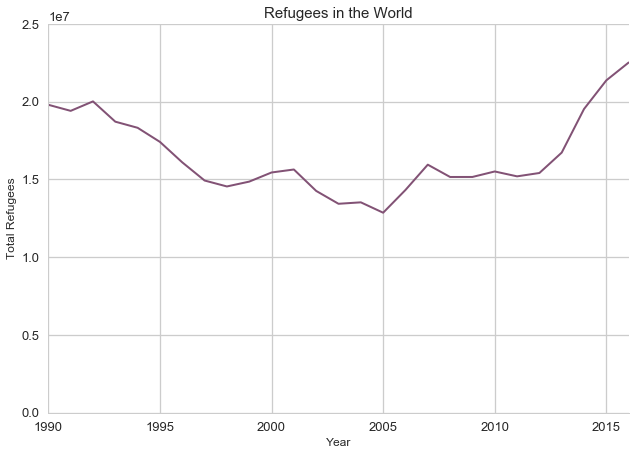

In [25]:
fig, ax = plt.subplots() # Here we create a figure and specify its settings below

ref['World'].plot(ax = ax, linewidth = 2, color = (0.51, 0.32, 0.46))

ax.set_ylim(0, 25000000)
ax.set_title('Refugees in the World', fontsize = 15)

ax.set_ylabel('Total Refugees', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.show()

We can see from this graph that worldwide refugee numbers are quite large. As well as a climb over the last few years, we have surpassed 20 million people globally. It leads us to question whether the almost 7-million person increase in worldwide refugees since 2010 has been one of the driving factors behind recent terrorist acts and fears towards refugees.

In [26]:
ref_1 = ref.sum().sort_values(ascending=False) # Here we sort for countries with the most refugees.
ref_1.head(5)

Country Name
World                   446259006.0
Afghanistan              82737348.0
Iraq                     23859547.0
Somalia                  18231079.0
Syrian Arab Republic     17730429.0
dtype: float64

This data shows us that there were a total of 4,446,259,006 refugees between 1990 - 2016. Since 2005, the number of refugees has been increasing. A rapid increase since 2005 was mainly due to the war in Iraq and Afghanistan. There is a drastic increase in the number of refugees since 2011 - right at the beginning of the [Syrian conflict](http://www.bbc.com/news/world-middle-east-26116868) that led to more than 4.5 million people fleeing Syria. We will take a closer look at the top 4 countries to get an idea of the situation nowadays.

##### Question of interest: How many refugees from Afghanistan, Iraq, Somalia and Syria were there between 1990 and 2016?

Afghanistan: According to *[WorldVision](https://www.worldvision.org/refugees-news-stories/forced-flee-top-5-countries-refugees)*, about 2.7 million people from Afghanistan are living as refugees.  Increased violence in 2015 and 2016 also led to a new surge of asylum seekers. Approximately 12 percent of the migrants and refugees arriving in Europe by sea this year are from Afghanistan.

Syria: An estimated 11 million Syrians have fled their homes since the outbreak of the civil war in March 2011. Among those escaping the conflict, the majority have sought refuge in neighbouring countries or within Syria itself. According to the United Nations High Commissioner for Refugees (UNHCR), 4.8 million have fled to Turkey, Lebanon, Jordan, Egypt and Iraq, and 6.6 million are internally displaced within Syria. Meanwhile about one million have requested asylum to Europe. Germany, with more than 300,000 cumulated applications, and Sweden with 100,000, are EU’s top receiving countries. 

Iraq: The number of Iraqi asylum seekers increased as the war in Iraq continued with most people fleeing to the neighbouring countries. 

Somalia: As the Somali Civil War continues, there have been a number of people continuously petitioning for asylum. 


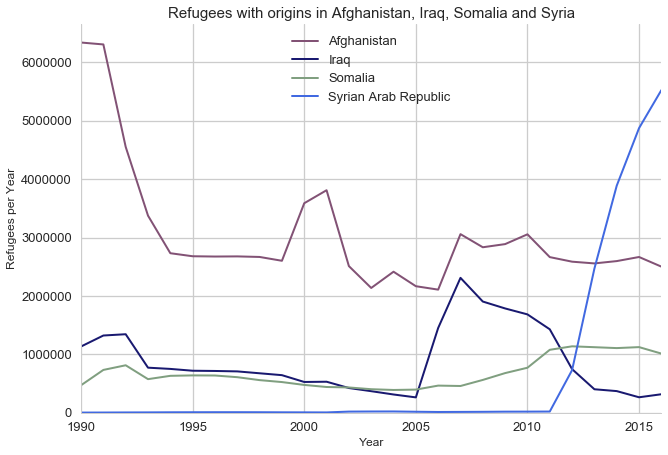

In [27]:
fig, ax = plt.subplots() # Here we create a figure to outline these countries of interest
                         # and specify its settings below

ref['Afghanistan'].plot(ax = ax, linewidth = 2, color =(0.51, 0.32, 0.46), legend = True)
ref['Iraq'].plot(ax = ax, linewidth = 2, color = 'midnightblue', legend = True)
ref['Somalia'].plot(ax = ax, linewidth = 2, color =(0.5,  0.625, 0.5), legend = True)
ref['Syrian Arab Republic'].plot(ax = ax, linewidth = 2, color ='royalblue', legend = True)


ax.set_ylim(0)
ax.set_title('Refugees with origins in Afghanistan, Iraq, Somalia and Syria', fontsize = 15)

ax.set_ylabel('Refugees per Year', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.show()

We can see that for these countries with the majority of refugees, the amount of refugees created has been stable for every country except Syria, obviously due to internal conflicts.

##### Next step: 
Though we started our research with a broad representation of refugee statistics, this data is important to us for future reference as we look at the countries where the biggest number of terrorists originate from. We would predict that the countries with the greatest number of terrorist attacks also show high numbers of people trying to seek asylum somewhere else. 

To continue our analysis, we will now find countries that received the biggest number of refugees over the past 26 years. We will narrow it down to the top 3 developed countries that host the greatest number of refugees and continue our research focusing on those countries as a general benchmark. 

##### Question of interest: What countries received the biggest number of refugees in 1990-2016?

In [28]:
ref2_a = ref2_p.sum().sort_values(ascending=False)
ref2_a.head(10)

Country
United States of America                                2029869.0
Canada                                                   391768.0
Australia                                                302593.0
Sweden                                                    50604.0
Norway                                                    35544.0
Denmark                                                   21460.0
New Zealand                                               19105.0
Finland                                                   18329.0
United Kingdom of Great Britain and Northern Ireland      16517.0
Netherlands                                               11386.0
dtype: float64

##### Finding:  None of the above countries are in the top countries in the world offering shelter to refugees in the recent period of 2015-2017.

We have noticed that our dataset is looking at developed countries and how they are affected by the refugee crisis. As such, countries who are experiencing the greatest refugee flee at the moment are not included. This is specifically why we target developed countries in our analysis.

According to our data, between 1990 and 2016, the United States was host to the biggest number of refugees, followed by Canada and Australia. Such finding is not what we would generally expect, the article *[Poorer countries host most of the forcibly displaced, report shows](http://www.unhcr.org/news/latest/2017/2/58b001ab4/poorer-countries-host-forcibly-displaced-report-shows.html)* by The UN Refugee Agency explains that low to middle income countries are offering shelter to most of the refugees nowadays. 

According to the article:
<center>"Of all countries, Turkey sheltered the greatest number of refugees, hosting 2.8 million by mid-2016. It was followed by Pakistan (1.6 million), Lebanon (1 million), Iran (978,000), Ethiopia (742,700), Jordan (691,800), Kenya (523,500), Uganda (512,600), Germany (478,600) and Chad (386,100)."</center>

In addition, according to the article *[Turkey, Pakistan, Lebanon Host the Highest Number of Refugees](https://www.bloomberg.com/graphics/2017-countries-of-asylum-for-migrants/)* by Bloomberg Turkey, Pakistan and Lebanon hosted the highest number of refugees in 2015 and 2016. While this is an interesting research question, we again choose to focus on highly developed regions in order to address the pressing concerns of assosciations with terrorist activities.

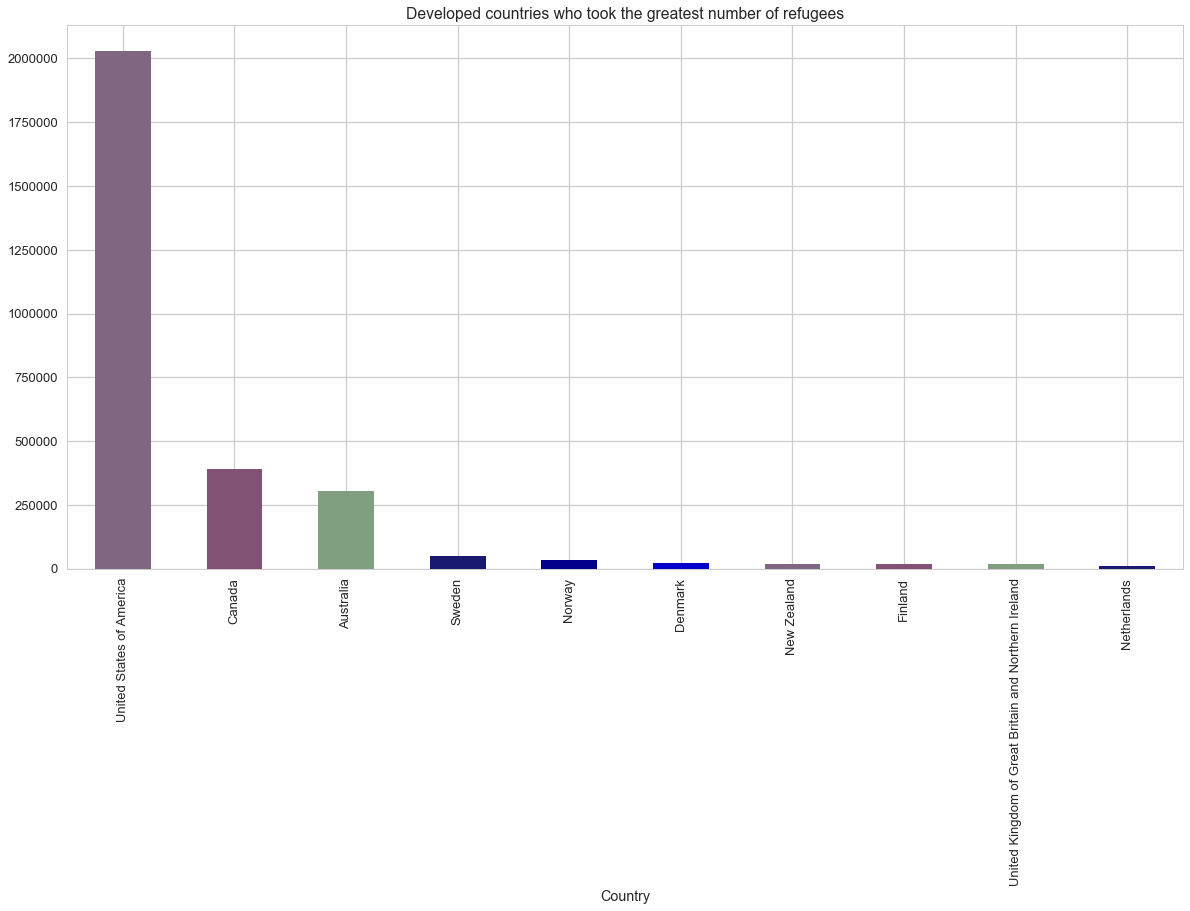

In [29]:
ref2_2 = ref2_a.groupby(['Country']).sum() # Here we organize the data to analyze those developed countries
                                           # of most interest to us
ref2_2 = ref2_2.sort_values( ascending=False)
ref2_2.head(10).plot(kind='bar', title="Developed countries who took the greatest number of refugees",
            stacked=True, color=[(0.5,0.4,0.5),(0.51, 0.32, 0.46), (0.5,  0.625, 0.5),'midnightblue', 
                                 'darkblue', 'mediumblue']*5, figsize=(20,10))

As we can see from the bar chart, there are three countries who have taken significantly more refugees in years 1990 - 2016. Therefore, we will now focus on the United States, Canada, and Australia in order to further explore our research question. 
Note: at this stage, we will not take into account the relative size of a country, accounting for it in the next part of our research. 

##### In more detail:

First, we create a plot to see the variation in the number of refugees received by the USA, Canada and Australia in 1990 - 2016:

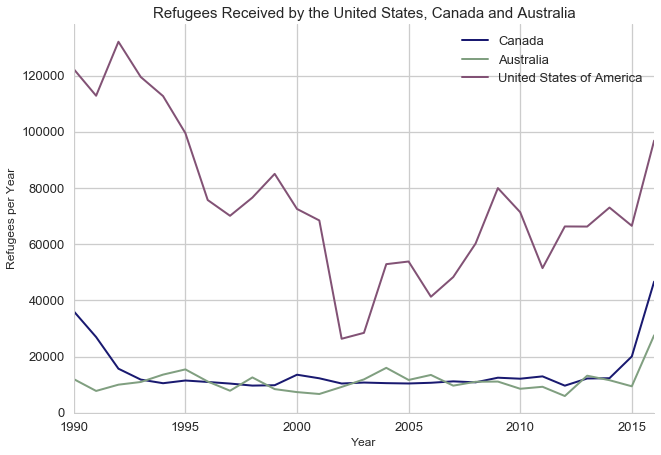

In [30]:
fig, ax = plt.subplots() # Here we create a figure and specify its settings below

ref2_p['Canada'].plot(ax = ax, linewidth = 2, color = 'midnightblue', legend = True)
ref2_p['Australia'].plot(ax = ax, linewidth = 2, color = (0.5,  0.625, 0.5), legend = True)
ref2_p['United States of America'].plot(ax = ax, linewidth = 2, color = (0.51, 0.32, 0.46), legend = True)


ax.set_ylim(0)
ax.set_title('Refugees Received by the United States, Canada and Australia', fontsize = 15)

ax.set_ylabel('Refugees per Year', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...


plt.show()

We are also interested in where specifically the refugees that end up in these countries come from. Though we found earlier that most refugees are coming from Afghanistan, Iraq, Somalia and Syrian Republic, we also know that most of the refugees fleeing the abovementioned countries settle in the neighbouring countries or seek asylum in Europe. Therefore, next bar charts will give us a closer look at the countries of origin of refugees in the US, Australia and Canada. 

In [31]:
ref2_origin = ref2.groupby(['Country','Origin', 'Year']).sum()
ref2_origin.head()
# Here, we group first by year so that we have one row per year and then 
# we group by origin and country so that there is one observation per country and per origin.
# The number of refugees by country is also summed per origin, per country, per year.

Refugees
Country   Origin   Year          
Argentina Colombia 2005        34
                   2006        19
                   2007        32
                   2008        42
                   2009        26

In [32]:
# Our next step is a pivot table:

ref_orig = ref2_origin.pivot_table( index='Origin', 
                                    columns='Country', 
                                    values='Refugees')
ref_orig['Total for US'] = ref_orig[['United States of America']].sum(axis=1)
ref_orig = ref_orig.sort_values('Total for US',  ascending=False)

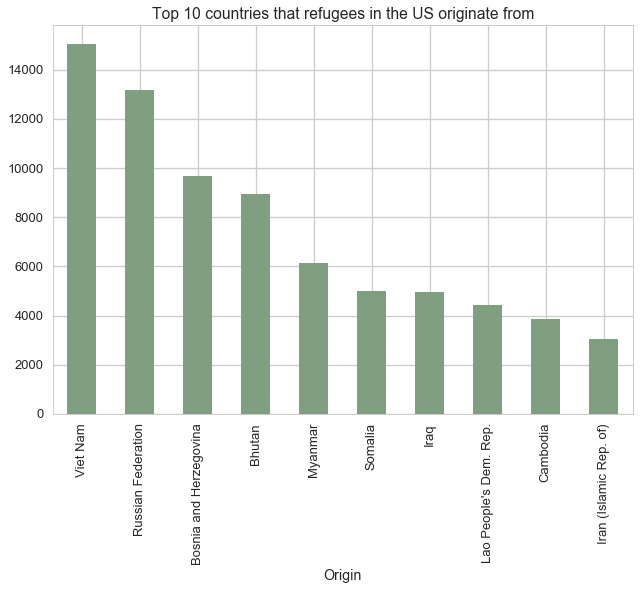

In [33]:
ref_orig['United States of America'].head(10).plot(kind='bar', 
                                                   title ='Top 10 countries that refugees in the US originate from', 
                                                   color = (0.5,  0.625, 0.5))

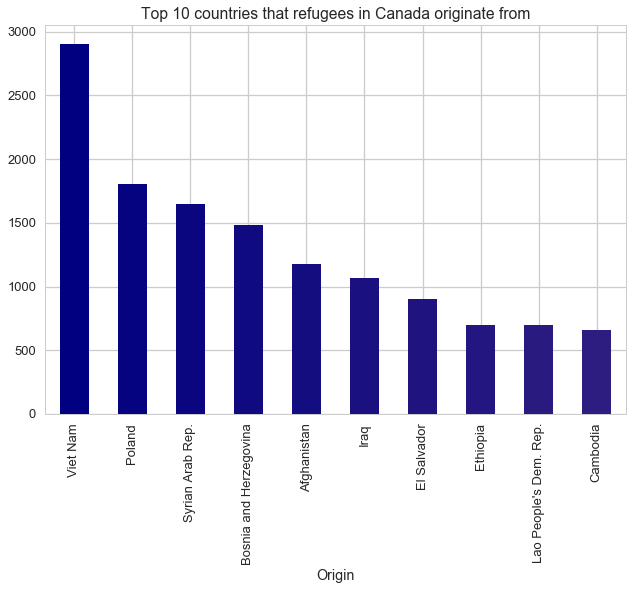

In [34]:
ref_orig['Total for Canada'] = ref_orig[['Canada']].sum(axis=1)
ref_orig = ref_orig.sort_values('Total for Canada',  ascending=False)
customcmap = [(x/50,  x/80, 0.5) for x in range(0, 20)]
ref_orig['Canada'].head(10).plot(kind='bar',  title ='Top 10 countries that refugees in Canada originate from', 
                                 color = customcmap)

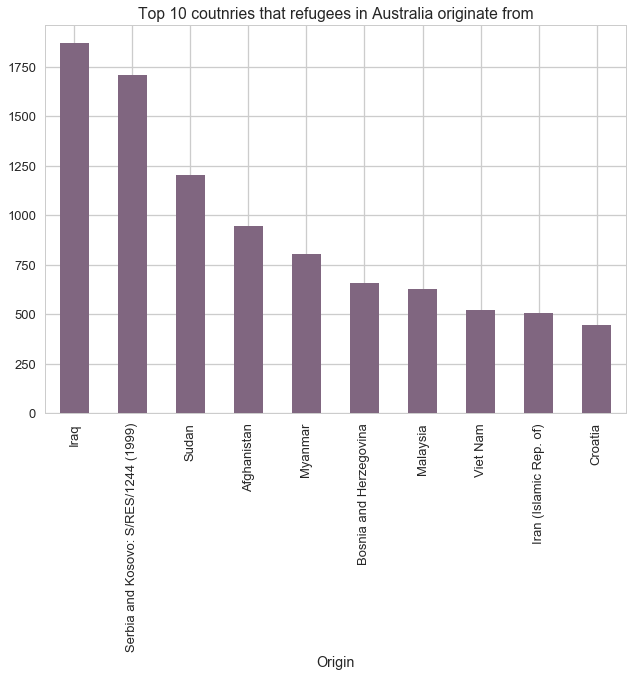

In [35]:
ref_orig['Total for Australia'] = ref_orig[['Australia']].sum(axis=1)
ref_orig = ref_orig.sort_values('Total for Australia',  ascending=False).drop('Various/unknown')
ref_orig['Australia'].head(10).plot(kind='bar',  title = 'Top 10 coutnries that refugees in Australia originate from',
                                    color = (0.5,0.4,0.5))


Our bar charts tell us that most of the refugees in the United States and Canada come from Vietnam, while the majority of refugees in Australia are coming from Iraq. We see refugees from Syria and Afghanistan coming to Canada, and some Iraqis seeking asylum in the US. 
##### Next steps: 
We will take a look at this data again once we come to our terrorism dataset. We now know what countries the majority of refugees in the US, Canada and Australia represent. Using our terrorism database, we will look at what countries people committing terrorist attacks in our developed countries of interest originate from. Is there a possibility that, for example, most terrorist attacks in Australia are caused by Iraqis (Iraqis being the biggest refugee population in Australia)? Answering this question will help us answer our research question: Is the terrorism in host countries related to the number of refugees these countries host?

### GDP and Unemployment in Developed Countries who hosted the Greatest Number of Refugees between 1990-2016

Before continuing with our research, we want to make sure that the countries we have chosen to further explore meet our criteria for *developed* countries. In the following analysis, we will look at two economic determinants - GDP and Uneployment - of our chosen countries, and also normalize our data to account for the size and population of the countries. For comparison, we will conclude with two graphs showing the net number of refugees Canada, Australia and the US received.

##### Question of interest: What were the GDP changes for USA, Australia and Canada in 1990-2016?

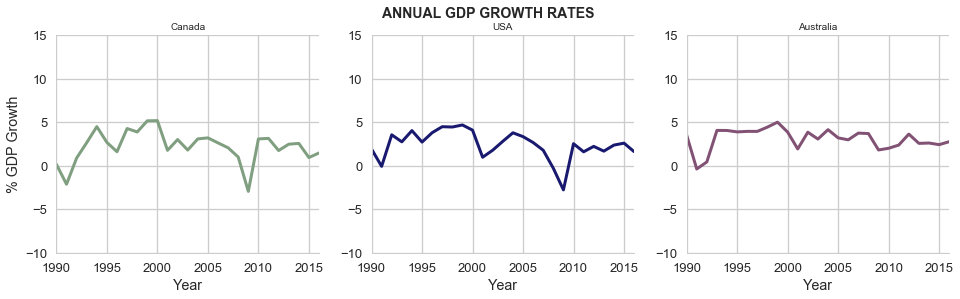

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (16,4)) 

gdp['Canada'].plot(ax = ax[0], color =(0.5,  0.625, 0.5), linewidth = 3.0) 
gdp['United States'].plot(ax = ax[1], color = 'midnightblue', linewidth = 3.0)
gdp['Australia'].plot(ax = ax[2], color = (0.51, 0.32, 0.46), linewidth = 3.0)

fig.suptitle("ANNUAL GDP GROWTH RATES", fontsize = 14, fontweight = "bold")

ax[0].set_title("Canada", fontsize = 10) 
ax[1].set_title("USA", fontsize = 10)
ax[2].set_title("Australia", fontsize = 10)
for var in ax: 
    
    var.set_ylim(-10, 15)  
    
    var.spines["right"].set_visible(False) 
    
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") 
ax[0].set_ylabel("% GDP Growth") 
plt.show()


These graphs provide a seeming correlation between the three countries, helping us see that maybe there are common traits in the developed world that make developed countries a strong host for refugees. There is overall steady and stable growth and a robust economy.

##### Question of interest: What were the changes in unemployment rates for USA and Canada in 1990-2016?

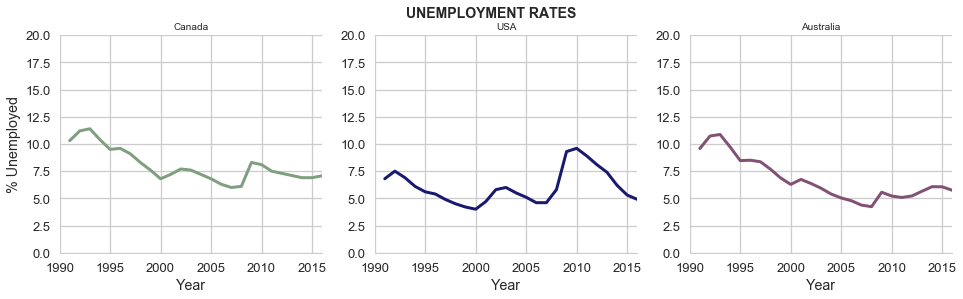

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (16,4)) 


une['Canada'].plot(ax = ax[0], color = (0.5,  0.625, 0.5), linewidth = 3.0) 
une['United States'].plot(ax = ax[1], color = 'midnightblue', linewidth = 3.0)
une['Australia'].plot(ax = ax[2], color = (0.51, 0.32, 0.46), linewidth = 3.0)

fig.suptitle("UNEMPLOYMENT RATES", fontsize = 14, fontweight = "bold")

ax[0].set_title("Canada", fontsize = 10) 
ax[1].set_title("USA", fontsize = 10)
ax[2].set_title("Australia", fontsize = 10)
for var in ax: 
    
    var.set_ylim(0, 20)  
    
    var.spines["right"].set_visible(False) 
    
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") 
ax[0].set_ylabel("% Unemployed") 
plt.show()

We can see that across these three countries there is also a relatively low rate of unemployment. A booming and stable eceonomy seem to be the factors that enable developed countries to host the most number of refugees.

These analyses help us see that there are no major socioeconomic reasons to fear refugee and terrorist attacks; these statistics are likely to be in a much more dire state in low-middle income countries that are also host to many refugees.

### Next steps

We can consolidate these data into specific dataframes for all of our three developed countries.

In [38]:
dfCa = pd.DataFrame() # Here create a Canada-specific dataframe that includes almost all of the data
                      # that we have imported and manipulated

Ca = dfCa.append([ref['Canada']])

Ca = Ca.transpose()

Ca.columns = ['Created']

Ca['Hosted'] = list(ref2_p.Canada)

Ca =Ca.fillna(0) # As we are missing data for some periods, we replace NaN with zero values

Ca['Net Refugees'] = Ca.Hosted - Ca.Created

Ca['% Unemployed'] = une.Canada

Ca['% GDP Growth'] = gdp.Canada

Ca['Population'] = pop.Canada

Ca['Refugees as % of Population'] = (Ca['Net Refugees']/Ca['Population'])*100

Ca.head(5)

,Created,Hosted,Net Refugees,% Unemployed,% GDP Growth,Population,Refugees as % of Population
Year,,,,,,,
1990,0.0,36084.0,36084.0,NaN,0.154346,27791000.0,0.129841
1991,4.0,26929.0,26925.0,10.3,-2.125692,28171682.0,0.095575
1992,4.0,15659.0,15655.0,11.2,0.882976,28519597.0,0.054892
1993,4.0,11785.0,11781.0,11.4,2.655236,28833410.0,0.040859
1994,4.0,10494.0,10490.0,10.4,4.493475,29111906.0,0.036033


We now have a dataframe specifically for Canada. We continue below to create these for both Australia and the United States and use these to further addressour research question.

In [39]:
dfUS = pd.DataFrame() # Here create a United States-specific dataframe that includes almost all of the data
                      # that we have imported and manipulated

US = dfUS.append([ref['United States']])

US = US.transpose()

US.columns = ['Created']

US['Hosted'] = list(ref2_p['United States of America'])

US = US.fillna(0) # As we are missing data for some periods, we replace NaN with zero values

US['Net Refugees'] = US.Hosted - US.Created

US['% Unemployed'] = une['United States']

US['% GDP Growth'] = gdp['United States']

US['Population'] = pop['United States']

US['Refugees as % of Population'] = (US['Net Refugees']/US['Population'])*100
US.head()

,Created,Hosted,Net Refugees,% Unemployed,% GDP Growth,Population,Refugees as % of Population
Year,,,,,,,
1990,1.0,122276.0,122275.0,NaN,1.919370,249623000.0,0.048984
1991,8.0,112811.0,112803.0,6.8,-0.074085,252981000.0,0.044590
1992,10.0,132032.0,132022.0,7.5,3.555396,256514000.0,0.051468
1993,12.0,119483.0,119471.0,6.9,2.745857,259919000.0,0.045965
1994,366.0,112682.0,112316.0,6.1,4.037643,263126000.0,0.042685


In [40]:
dfAU = pd.DataFrame() # Here create an Australia-specific dataframe that includes almost all of the data
                      # that we have imported and manipulated

AU = dfAU.append([ref['Australia']])

AU = AU.transpose()

AU.columns = ['Created']

AU['Hosted'] = list(ref2_p['Australia'])

AU = AU.fillna(0) # As we are missing data for some periods, we replace NaN with zero values

AU['Net Refugees'] = AU.Hosted - AU.Created

AU['% Unemployed'] = une['Australia']

AU['% GDP Growth'] = gdp['Australia']

AU['Population'] = pop['Australia']

AU['Refugees as % of Population'] = (AU['Net Refugees']/AU['Population'])*100

AU.head(5)

,Created,Hosted,Net Refugees,% Unemployed,% GDP Growth,Population,Refugees as % of Population
Year,,,,,,,
1990,0.0,11948.0,11948.0,NaN,3.530801,17065100.0,0.070014
1991,0.0,7745.0,7745.0,9.579,-0.375333,17284000.0,0.044810
1992,0.0,9974.0,9974.0,10.729,0.436464,17495000.0,0.057011
1993,0.0,10930.0,10930.0,10.874,4.061994,17667000.0,0.061867
1994,2.0,13557.0,13555.0,9.719,4.051611,17855000.0,0.075917


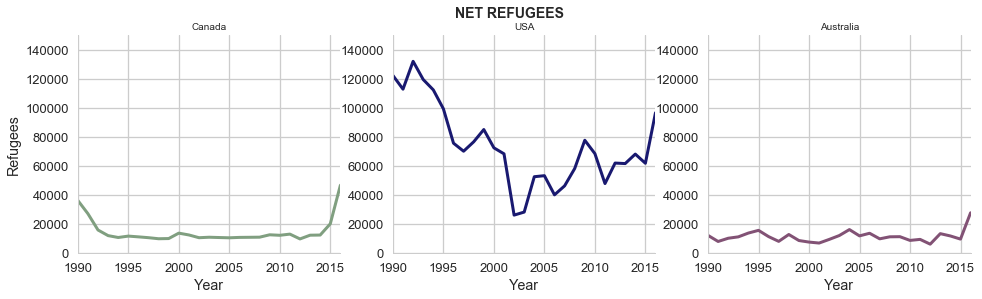

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (16,4)) 

# We can now use these dataframes to analyze and view some key statistics for our countries of interest.

Ca['Net Refugees'].plot(ax = ax[0], color = (0.5,  0.625, 0.5), linewidth = 3.0) 
US['Net Refugees'].plot(ax = ax[1], color = 'midnightblue', linewidth = 3.0)
AU['Net Refugees'].plot(ax = ax[2], color = (0.51, 0.32, 0.46), linewidth = 3.0)

fig.suptitle("NET REFUGEES", fontsize = 14, fontweight = "bold")

ax[0].set_title("Canada", fontsize = 10) 
ax[1].set_title("USA", fontsize = 10)
ax[2].set_title("Australia", fontsize = 10)

for var in ax: 
    
    var.set_ylim(0, 150000)  
    
    var.spines["right"].set_visible(False) 

    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") 
   
ax[0].set_ylabel("Refugees") 
plt.show()

While recent news has given a lot of credence to Canada for being welcoming to regufees, we can see that the US is still the biggest host and takes in the most net refugees every year. However, if we plot refugees taken in as a percentage of population, we get the following:

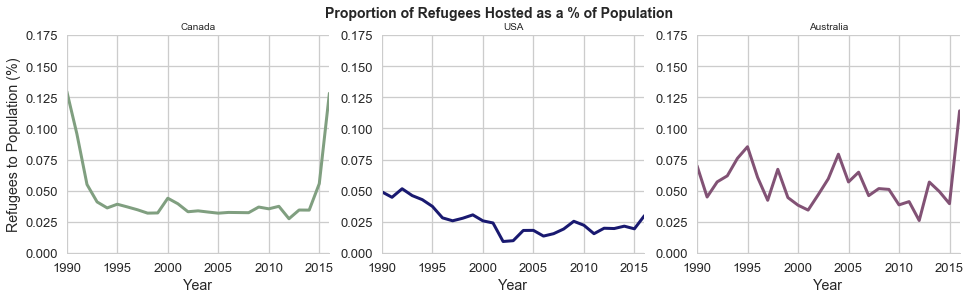

In [42]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (16,4)) 

# We plot the number of refugees as a % of population to compare across the three countries

Ca['Refugees as % of Population'].plot(ax = ax[0], color = (0.5,  0.625, 0.5), linewidth = 3.0) 
US['Refugees as % of Population'].plot(ax = ax[1], color = 'midnightblue', linewidth = 3.0)
AU['Refugees as % of Population'].plot(ax = ax[2], color = (0.51, 0.32, 0.46), linewidth = 3.0)

fig.suptitle("Proportion of Refugees Hosted as a % of Population", fontsize = 14, fontweight = "bold")

ax[0].set_title("Canada", fontsize = 10) 
ax[1].set_title("USA", fontsize = 10)
ax[2].set_title("Australia", fontsize = 10)

for var in ax: 
    
    var.set_ylim(0, 0.175)  
    
    var.spines["right"].set_visible(False) 

    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") 
   
ax[0].set_ylabel("Refugees to Population (%)") 
plt.show()

We can see through this analysis that Canada is indeed taking more refugees as a proportion to their population in the last few of years compared to the US. However, we get the unexpected result that Australia is, on average, the developed country that has taken in the highest proportion of refugees to population since 1990. 

##### Question of interest: How are these countries influenced by terrorist attacks?

### Terrorism Data 1990-2016

In this section, we will look at the Global Terrorism Database to see whether our three developed countries have experienced an increase in terrorist attacks and whether those were performed by people originating from refugees' countries of origin. We will use our data on terrorism to do the following: 
* Group by country all the terrorist attacks that have taken place in the world between 1990-2016 to single out the countries with the greatest number of terrorist attacks
* Find the origin of the most frequent attackers and plot them on a world map
* Look for possible patterns and come up with a hypothesis (should there be a possible connection between the countries where attacks are happening and the origin of the people attacking)
* Test our hypothesis by looking at the terrorism data for US, Canada and Australia


##### Question of interest: What countries had the greatest number of terrorist attacks in 1990-2016?

We wanted to create a map to see where terrorist attacks are the most frequent. In order to do so, we grouped the number of terrorist attacks by country and displayed it in a horizontal bar chart.

In [43]:
cnt = gt["Country"].value_counts()[1:21] # Calculate the number of attacks per country from 1990-2016
cnt

Pakistan                    13421
Afghanistan                 11280
India                        9726
Philippines                  5170
Colombia                     4793
Thailand                     3568
Somalia                      3464
Nigeria                      3412
Turkey                       3282
Yemen                        3109
Algeria                      2725
Russia                       2158
United Kingdom               2146
Egypt                        2114
Libya                        2045
Peru                         1846
Syria                        1807
West Bank and Gaza Strip     1801
Sri Lanka                    1658
Ukraine                      1650
Name: Country, dtype: int64

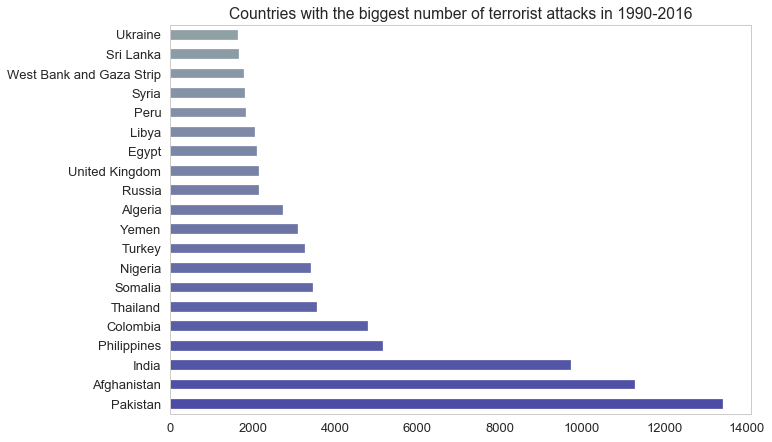

In [44]:
# Set color transparency (0: transparent; 1: solid)
a = 0.7
# Create a colormap
customcmap = [(x/50,  x/40, 0.5) for x in range(0, 25)]
# Plot the 'population' column as horizontal bar plot
cnt.plot(kind='barh', grid = False, alpha=a, legend=False, color=customcmap,
                      edgecolor='w', title="Countries with the biggest number of terrorist attacks in 1990-2016")

From our data, we can see that top three developed countries that we are considering (USA, Canada, Australia) are less exposed to terrorism compared to the rest of the world (Especially the Middle East, India and Africa). When it comes to the developed countries, United Kingdom had 2146 attacks in our timeframe. Countries with the greatest number of attacks are Pakistan, Afghanistan and India. Indeed, our three developed countries of interest are not even on this list!

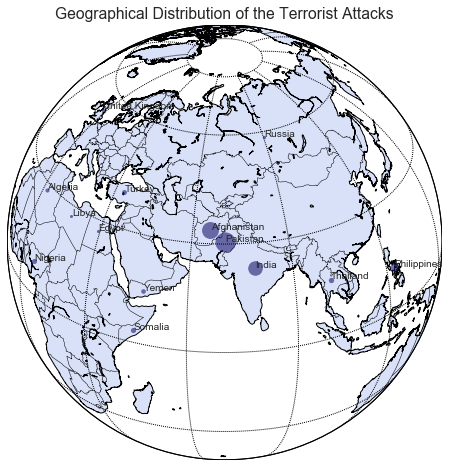

In [45]:
plt.figure(figsize=(8,8)) # Here we plot on a map to show just how terrorist attacks are distributed geographically. 


my_map = Basemap(projection='ortho', 
                 lat_0=30.448, lon_0=70.135, # Here is the update
                 resolution='l', area_thresh=1000.0)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawstates() 
my_map.fillcontinents(alpha = 0.2, color='royalblue')
my_map.drawmapboundary()

plt.title("Geographical Distribution of the Terrorist Attacks")

lon = [65.566, 70.135, 78.837, 122.87, 100.72, 45.17, 7.38, 33.57, 47.11, 2.11, 90.35, -2.64, 29.36, 17.58]

lat = [33.724, 30.449, 23.322, 12.55, 16.64, 3.69, 9.45, 39.37, 15.28, 28.15, 58.45, 54.16, 27.06, 27.37]

labels = ['Afghanistan', 'Pakistan', 'India', 'Philippines', 'Thailand', 'Somalia', 'Nigeria', 
         'Turkey', 'Yemen', 'Algeria', 'Russia', 'United Kingdom', 'Egypt', 'Libya']

x,y = my_map(lon, lat) 
att = [11280, 13421, 9726, 5170, 3568, 3464, 3412, 3282, 3109, 2725, 2158, 2146, 2114, 2045]
min_marker_size = 0.0015

#my_map.scatter(x,y, latlon = False, alpha = 1, color = "midnightblue", marker='o')
for lon, lat, attac, label in zip(lon, lat, att, labels):
    x,y = my_map(lon, lat)
    msize = attac * min_marker_size
    
    my_map.plot(x, y, 'ro', color = 'midnightblue', markersize=msize, alpha = 0.6)
    
    
#for label, xpt, ypt in zip(labels, x, y):
    #plt.text(xpt+13000, ypt+13000, label)
    plt.text(x + 13000, y + 13000, label)

my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

##### Question of interest: Where do the most frequent attackers originate from? 

We have identified in our research that refugees tend to relocate to areas nearby. It is informative to our research question to see how many of the attacks have specific countries of origin. We thus count the number of attacks carried out by each nationality from 1990 to 2016 and arrive to the following conclusion:

In [46]:
nat = gt["Nationality"].value_counts()[1:21] # Counting the number per nationality
nat

Pakistan         13001
India             9744
Afghanistan       9643
Philippines       5020
Colombia          4606
Turkey            3608
Thailand          3535
Nigeria           3264
Yemen             2901
Israel            2697
Algeria           2621
Somalia           2619
International     2346
Russia            2276
Egypt             2137
United States     1994
Libya             1888
Peru              1763
Syria             1675
Sri Lanka         1623
Name: Nationality, dtype: int64

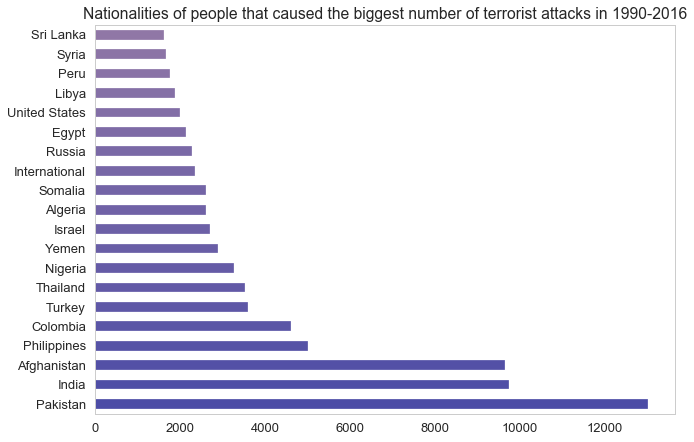

In [47]:
nat = gt["Nationality"].value_counts()[1:21]
# Set color transparency (0: transparent; 1: solid)
a = 0.7
# Create a colormap
customcmap = [(x/50,  x/80, 0.5) for x in range(0, 25)]
# Plot the 'population' column as horizontal bar plot
nat.plot(kind='barh', grid = False, alpha=a, legend=False, color=customcmap,
                      edgecolor='w',  title=
         'Nationalities of people that caused the biggest number of terrorist attacks in 1990-2016')

We can see here that a vast majority of terrorist attacks are carried out by people of nationalities far away from the US, Canada and even Australia. We also see that the United States has had a lot of terrorists of American nationality.

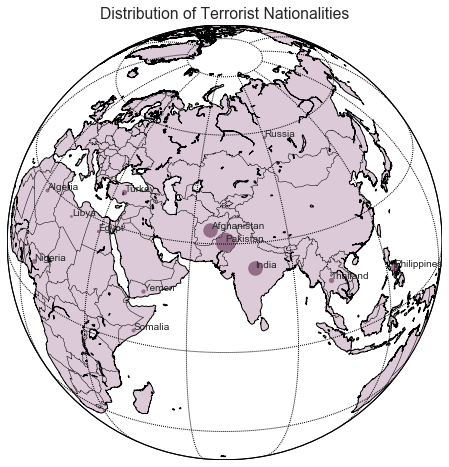

In [48]:
plt.figure(figsize=(8,8)) # Here we plot on a map to show the distribution of terrorist nationality.


my_map = Basemap(projection='ortho', 
                 lat_0=30.448, lon_0=70.135, # Here is the update
                 resolution='l', area_thresh=1000.0)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawstates() 
my_map.fillcontinents(alpha = 0.5, color= (0.74, 0.59, 0.70))
my_map.drawmapboundary()

plt.title("Distribution of Terrorist Nationalities")


lon = [65.566, 70.135, 78.837, 122.87, 100.72, 45.17, 7.38, 33.57, 47.11, 2.11, 90.35,  29.36, 17.58 ]

lat = [33.724, 30.449, 23.322, 12.55, 16.64, 3.69, 9.45, 39.37, 15.28, 28.15, 58.45,  27.06, 27.37]

labels = ['Afghanistan', 'Pakistan', 'India', 'Philippines', 'Thailand', 'Somalia', 'Nigeria', 
         'Turkey', 'Yemen', 'Algeria', 'Russia', 'Egypt', 'Libya']

x,y = my_map(lon, lat) 
att = [9643, 13001, 9744, 5020, 3535, 2619, 3264, 3608, 2901, 2621, 2276, 2137, 1888]
min_marker_size = 0.0015

#my_map.scatter(x,y, latlon = False, alpha = 1, color = "midnightblue", marker='o')
for lon, lat, attac, label in zip(lon, lat, att, labels):
    x,y = my_map(lon, lat)
    msize = attac * min_marker_size
    
    my_map.plot(x, y, 'ro', color = (0.45, 0.28, 0.40), markersize=msize, alpha = 0.7)
    
    
#for label, xpt, ypt in zip(labels, x, y):
    #plt.text(xpt+13000, ypt+13000, label)
    plt.text(x + 13000, y + 13000, label)

my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

This map, in contrast to the earlier map, shows us how geographically distributed the nationalities behind terrorist attacks are. It is fascinating how similar they look and they are a visual affirmation that countries around the world seem to be the origin of their own terrorists. From our analysis, we can see that the top 5 countries with the biggest number of terrorist attacks in 1990 - 2016 are also the top 5 countries where the greatest number of attackers come from. This relates perfectly back to our question of whether refugees are truly responsible for an increase in terrorist activities. The two pie charts below represent this data. 

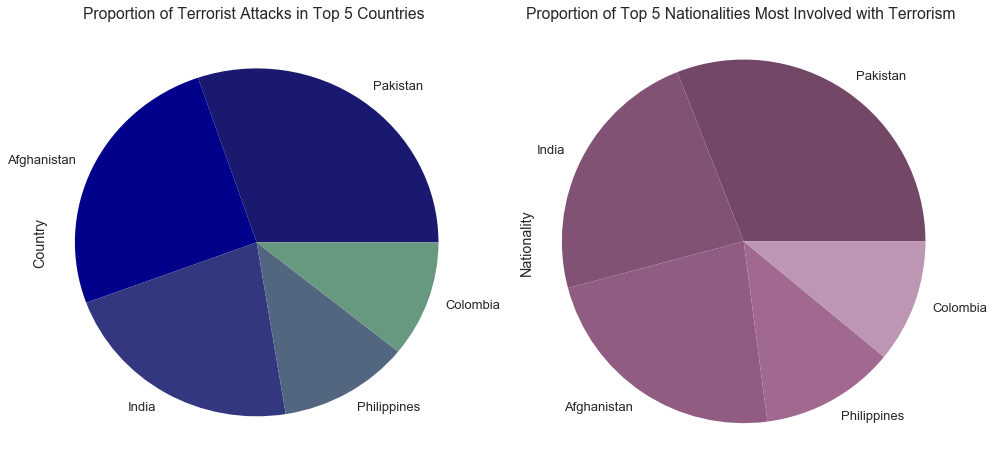

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (16,8)) 
cnt.head().plot(ax = ax[0], kind='pie', colors=['midnightblue', 'darkblue', (0.2, 0.215, 0.5), 
                                                (0.32, 0.4, 0.5), (0.4,  0.6, 0.5)], 
                                               title = "Proportion of Terrorist Attacks in Top 5 Countries")
plt.axis('equal')
nat.head().plot(ax = ax[1], kind='pie', colors=[(0.45, 0.28, 0.40), (0.51, 0.32, 0.46), (0.57, 0.36, 0.51), 
                                                (0.63, 0.41, 0.56), (0.74, 0.59, 0.70)], 
                                            title = "Proportion of Top 5 Nationalities Most Involved with Terrorism")
plt.axis('equal')
plt.show()

We can see that, for example, Pakistan is the country that *had* the greatest number of attacks over our time period. In addition, we can see that Pakistanis *caused* the greatest number of terrorist attacks during 1990 - 2016. Our assumption is that people from Pakistan are mostly the ones that caused the greatest number of attacks in Pakistan. This is an assumption since we cannot derive this information directly, but we can formulate our hypothesis by looking at the number of attacks per country, per origin and per year (grouping the columns), which we will do in the next section.
 
##### Hypothesis: Most terrorist attacks within a country are done by the people that originate from that country 

##### Next steps: 
In addition, in the beginning of our project, we found that most refugees originated from Afghanistan in 1990 - 2016. Looking at the data, nationals of Afghanistan are in the top 5 by the number of terrorist attacks in the world. Is there a connection? After testing our hypothesis, we can single out top nationalities that engage in terrorism in Canada, US and Australia and compare them with top nationalities that seek asylum in these countries. If true, our hypothesis will allow us to further test the prediction that refugees do not pose significant threats to developed countries when it comes to terrorism. 

In [50]:
gt['num_attacks'] = 1 # adding an additional column 'num_attacks' to count the total number of attacks by 
                      # nationality 
origin = gt.groupby(['Country','Nationality'])
attacks = origin["num_attacks"].sum()
attacks.head()

Country      Nationality
Afghanistan  Afghanistan    9515
             Algeria           2
             Asian             3
             Australia         2
             Bangladesh        6
Name: num_attacks, dtype: int64

In order to address our question of interest, we first looke at Pakistan (to check our assumption) and then continue by looking at our three developed countries in order to test our hypothesis and address our research question. The bar chart below shows that most of the terrorism in Pakistan is done by the attackers of Pakistani origin.

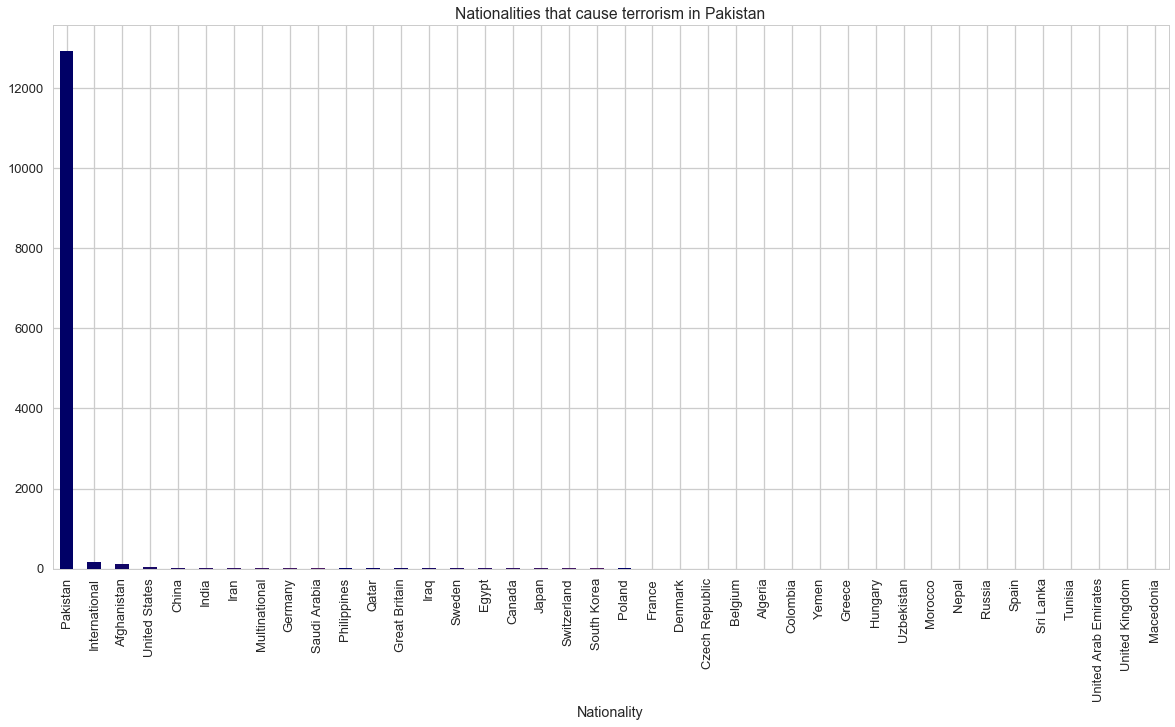

In [51]:
custom = [(x/30,  x/80, 0.4) for x in range(0, 10)]
attacks['Pakistan'].sort_values(ascending=False).plot(kind='bar', figsize=(20,10), color=custom, 
                                                      title='Nationalities that cause terrorism in Pakistan')

##### Question of interest: Does our hypothesis hold for developed countries? 

With the bar charts below, we are showing that our hypothesis is true for three developed countries we focused our research on. 

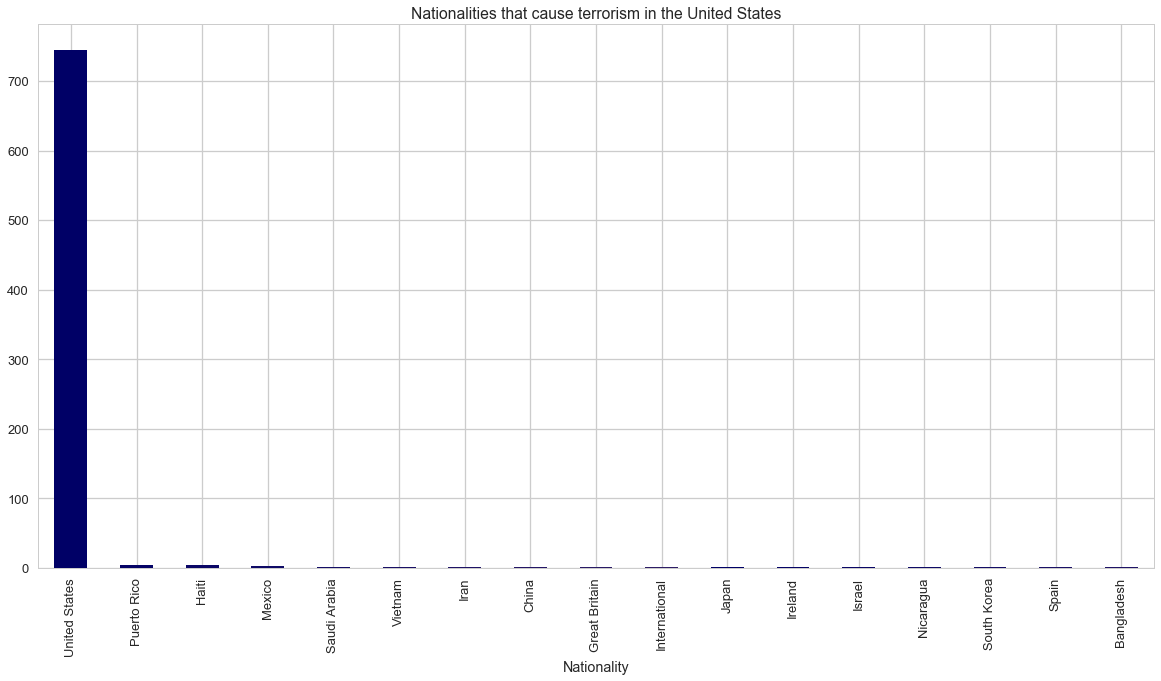

In [52]:
custom = [(x/50,  x/80, 0.4) for x in range(0, 10)]
attacks['United States'].sort_values(ascending=False).plot(kind='bar', figsize=(20,10), color=custom,
                                                title='Nationalities that cause terrorism in the United States')

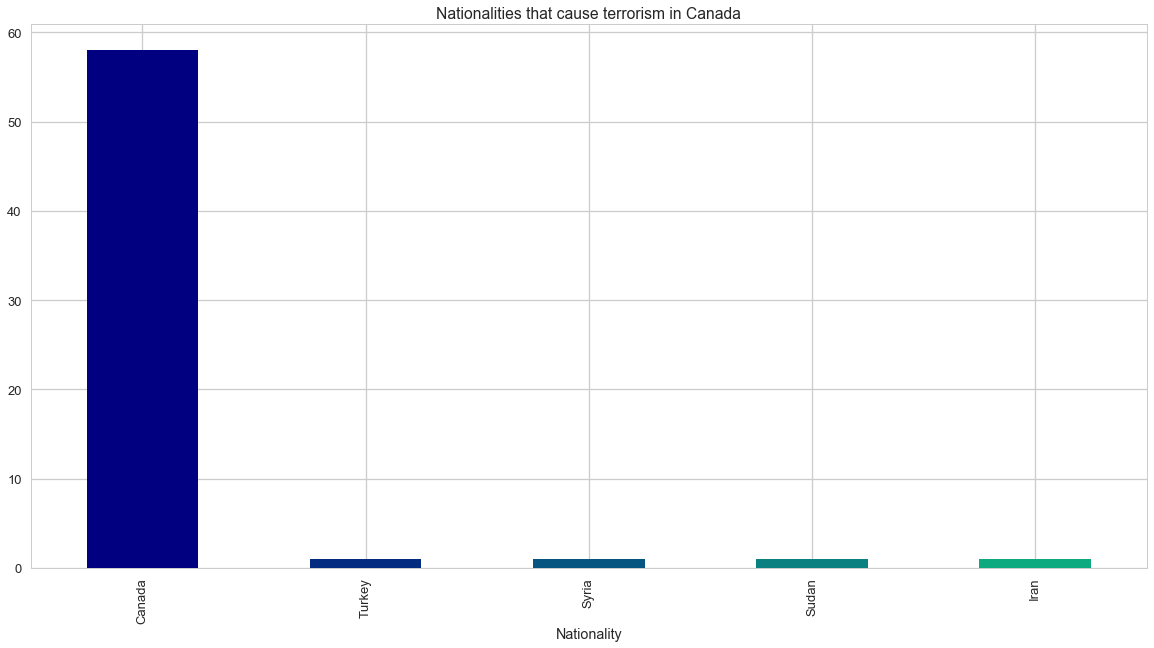

In [53]:
custom = [(x/80,  x/6, 0.5) for x in range(0, 5)]
attacks['Canada'].sort_values(ascending=False).plot(kind='bar', figsize=(20,10), color=custom,
                                                    title='Nationalities that cause terrorism in Canada')

##### Note: 
Canada appears to be the only country with its all top attackers (apart from Canadians) being from the Middle East. 

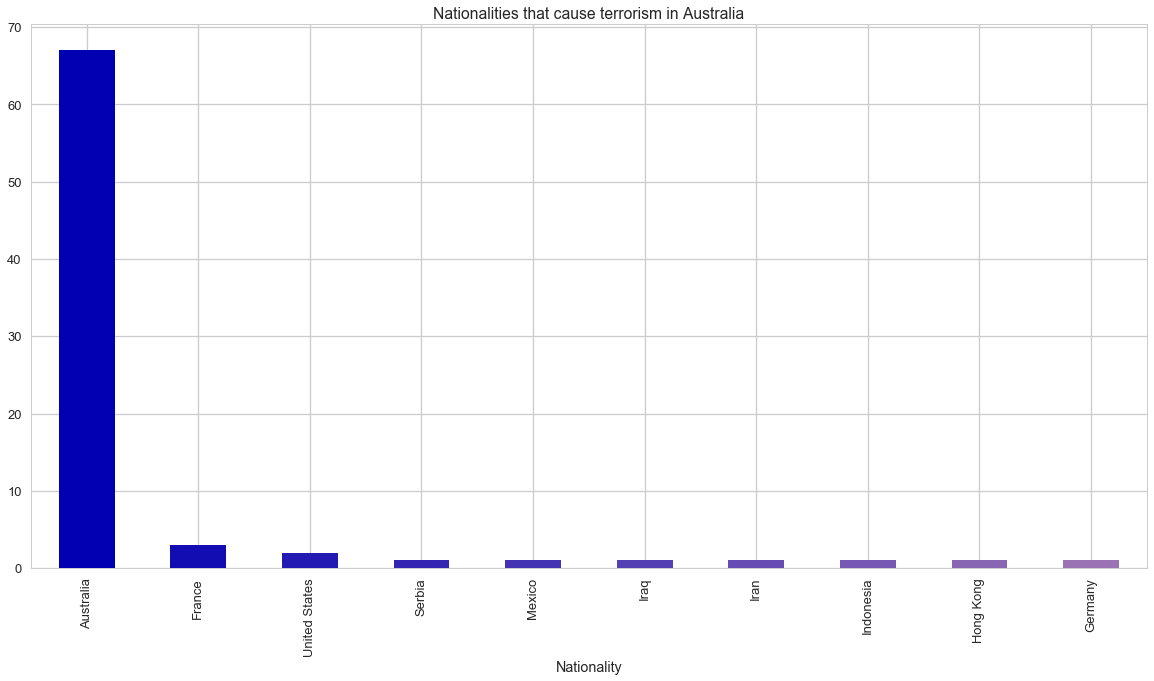

In [54]:
custom = [(x/15,  x/20, 0.7) for x in range(0, 10)]
attacks['Australia'].sort_values(ascending=False).plot(kind='bar', figsize=(20,10), color=custom, 
                                                      title='Nationalities that cause terrorism in Australia')

##### Note: 
We were surprised to find that in second place we have France. According to Australian Bureau of Statistics, England is the second largest population residing in Australia. France, however, is not even in the top 15 countries. It is unclear whether French attackers were residing in Australia or just passing by, and it would be an interesting research question should we decide to further elaborate this paper.

##### Our outcome: 
Looking at our bar charts, we see that, indeed, most of the terorrist attacks that happened in the US, Canada and Australia were done by the natives of the mentioned countries. In addition, it is interesting to note that other nationalities that attack the most in our developed countries do not include Pakistan, India or Afghanistan (top three nationalities of most attackers in the world). It would lead to the conclusion that not only do countries experience most of terrorism from the hand of their natives, but that developed countries that are geographically far away from the Middle East are less likely to be targeted by (the traditional preconception) of Middle Eastern terrorists. 

## Conclusion

***Research question***: *Which developed countries are most involved with refugee crises? Is terrorism in countries that host refugees related to the number of refugees they host?*

We've done a thorough analysis of both how refugees are distributed among developed countries and about how terrorism is distributed across the world. We have identified that, from developed countries to terrorist-prone countries, there is a common denominator of many of the attackers originating from the country of attack.

This conclusion helps us see that a lot of the fear and hyperbole behind refugees as terrorists is out of porportion to reality. Indeed, all of our developed countries experience terrorists attacks in majority from their own citizens. This is a counterintuitive conclusion as a lot of news and conversations center around xenophobia and pointing the finger outwards instead of inwards. 

We end our research project with a desire to investigate further into why citizens elect to commit terrorist activities in their own countries, as well as to why there is such widespread fear of refugees. Our project has provided solid ground upon which to lessen the fear and anxieties that exist around refugee crises and we hope to spur further research in the above areas, as well as to the stimulants of terrorist attacks.